# Dataset 4 - Boston

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import ABC_train_test
import bostonDataset
import baselineModels
import network
import statsModel
import performanceMetrics
import dataset
import sanityChecks
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Parameters

General Parameters 

1. Number of Samples
2. Number of features 

ABC-Generator parameters are as mentioned below: 
1. mean : 1 ($\beta \sim N(\beta^{*},\sigma)$ where $\beta^{*}$ are coefficients of statistical model) or 1 ($\beta \sim N(0,\sigma)$
2. std : $\sigma = 1, 0.1 , 0.01$ (standard deviation)

In [3]:
n_features = 13
n_samples= 506
n_target = 1 
 
#ABC Generator Parameters
mean = 1 
variance = 0.01

#Hyper-parameters 
n_epochs = 100

In [4]:
# Parameters
mean = 1
variance = 1
n_epochs = 5000


## Dataset

In [5]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              80.59
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                   6.62e-102
Time:                        18:42:31   Log-Likelihood:                         -305.07
No. Observations:                 404   AIC:                                      636.1
Df Residuals:                     391   BIC:                                      688.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

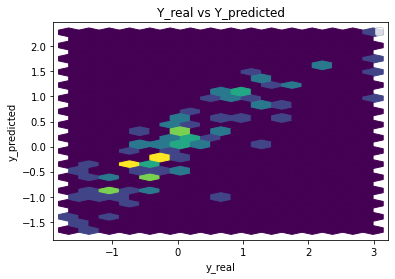

Performance Metrics
Mean Squared Error: 0.248208285856076
Mean Absolute Error: 0.3532320275767402
Manhattan distance: 36.0296668128275
Euclidean distance: 5.031624504801581


In [7]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

## Random Forest

In [8]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)

Mean Squared error 0.3387901520605623


## Catboost

In [9]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)

Learning rate set to 0.03548
0:	learn: 0.9444127	total: 165ms	remaining: 2m 45s
1:	learn: 0.9225995	total: 170ms	remaining: 1m 24s


2:	learn: 0.9020952	total: 176ms	remaining: 58.5s
3:	learn: 0.8857717	total: 181ms	remaining: 45.1s
4:	learn: 0.8671473	total: 186ms	remaining: 36.9s
5:	learn: 0.8523340	total: 190ms	remaining: 31.5s
6:	learn: 0.8357515	total: 195ms	remaining: 27.6s
7:	learn: 0.8198427	total: 199ms	remaining: 24.6s
8:	learn: 0.8046820	total: 204ms	remaining: 22.4s
9:	learn: 0.7883086	total: 208ms	remaining: 20.6s
10:	learn: 0.7747500	total: 213ms	remaining: 19.1s
11:	learn: 0.7598179	total: 217ms	remaining: 17.9s
12:	learn: 0.7446064	total: 222ms	remaining: 16.8s
13:	learn: 0.7300991	total: 226ms	remaining: 15.9s
14:	learn: 0.7181981	total: 230ms	remaining: 15.1s
15:	learn: 0.7033804	total: 235ms	remaining: 14.4s
16:	learn: 0.6909319	total: 239ms	remaining: 13.8s
17:	learn: 0.6779862	total: 244ms	remaining: 13.3s
18:	learn: 0.6655720	total: 248ms	remaining: 12.8s
19:	learn: 0.6530875	total: 253ms	remaining: 12.4s
20:	learn: 0.6395888	total: 257ms	remaining: 12s
21:	learn: 0.6273703	total: 262ms	remaini

39:	learn: 0.4745418	total: 344ms	remaining: 8.25s
40:	learn: 0.4688111	total: 349ms	remaining: 8.16s
41:	learn: 0.4628515	total: 354ms	remaining: 8.07s
42:	learn: 0.4574722	total: 358ms	remaining: 7.98s
43:	learn: 0.4512476	total: 363ms	remaining: 7.89s
44:	learn: 0.4453086	total: 368ms	remaining: 7.81s
45:	learn: 0.4401185	total: 372ms	remaining: 7.71s
46:	learn: 0.4357028	total: 376ms	remaining: 7.63s
47:	learn: 0.4305648	total: 380ms	remaining: 7.54s
48:	learn: 0.4256119	total: 385ms	remaining: 7.47s
49:	learn: 0.4220945	total: 390ms	remaining: 7.4s
50:	learn: 0.4172540	total: 394ms	remaining: 7.34s
51:	learn: 0.4133465	total: 399ms	remaining: 7.27s
52:	learn: 0.4090154	total: 404ms	remaining: 7.21s
53:	learn: 0.4056654	total: 407ms	remaining: 7.13s
54:	learn: 0.4011698	total: 411ms	remaining: 7.06s
55:	learn: 0.3975771	total: 415ms	remaining: 7s
56:	learn: 0.3944265	total: 420ms	remaining: 6.95s
57:	learn: 0.3904069	total: 424ms	remaining: 6.89s
58:	learn: 0.3871310	total: 429ms	r

78:	learn: 0.3279551	total: 513ms	remaining: 5.97s
79:	learn: 0.3258522	total: 517ms	remaining: 5.95s
80:	learn: 0.3236737	total: 521ms	remaining: 5.91s
81:	learn: 0.3216457	total: 525ms	remaining: 5.88s
82:	learn: 0.3204407	total: 529ms	remaining: 5.84s
83:	learn: 0.3182057	total: 533ms	remaining: 5.81s
84:	learn: 0.3166351	total: 537ms	remaining: 5.78s
85:	learn: 0.3147581	total: 541ms	remaining: 5.75s
86:	learn: 0.3128110	total: 546ms	remaining: 5.73s
87:	learn: 0.3109244	total: 552ms	remaining: 5.72s
88:	learn: 0.3090737	total: 558ms	remaining: 5.71s
89:	learn: 0.3071974	total: 562ms	remaining: 5.68s
90:	learn: 0.3051528	total: 567ms	remaining: 5.66s
91:	learn: 0.3035640	total: 572ms	remaining: 5.64s
92:	learn: 0.3023293	total: 576ms	remaining: 5.62s
93:	learn: 0.3004770	total: 581ms	remaining: 5.6s
94:	learn: 0.2990213	total: 586ms	remaining: 5.58s
95:	learn: 0.2976756	total: 591ms	remaining: 5.56s
96:	learn: 0.2965566	total: 595ms	remaining: 5.54s
97:	learn: 0.2954156	total: 601m

113:	learn: 0.2746123	total: 685ms	remaining: 5.32s
114:	learn: 0.2732174	total: 689ms	remaining: 5.3s
115:	learn: 0.2721325	total: 693ms	remaining: 5.28s
116:	learn: 0.2711027	total: 696ms	remaining: 5.25s
117:	learn: 0.2702668	total: 701ms	remaining: 5.24s
118:	learn: 0.2690782	total: 706ms	remaining: 5.22s
119:	learn: 0.2685273	total: 711ms	remaining: 5.22s
120:	learn: 0.2674268	total: 717ms	remaining: 5.21s
121:	learn: 0.2666713	total: 721ms	remaining: 5.19s
122:	learn: 0.2659112	total: 726ms	remaining: 5.18s
123:	learn: 0.2648599	total: 731ms	remaining: 5.16s
124:	learn: 0.2636354	total: 736ms	remaining: 5.15s
125:	learn: 0.2625919	total: 741ms	remaining: 5.14s
126:	learn: 0.2613132	total: 745ms	remaining: 5.12s
127:	learn: 0.2603732	total: 749ms	remaining: 5.11s
128:	learn: 0.2594725	total: 754ms	remaining: 5.09s
129:	learn: 0.2583529	total: 758ms	remaining: 5.07s
130:	learn: 0.2574835	total: 763ms	remaining: 5.06s
131:	learn: 0.2566485	total: 767ms	remaining: 5.04s
132:	learn: 0

149:	learn: 0.2426885	total: 860ms	remaining: 4.87s
150:	learn: 0.2418385	total: 865ms	remaining: 4.86s
151:	learn: 0.2413657	total: 870ms	remaining: 4.85s
152:	learn: 0.2403971	total: 874ms	remaining: 4.84s
153:	learn: 0.2396508	total: 879ms	remaining: 4.83s
154:	learn: 0.2390946	total: 883ms	remaining: 4.82s
155:	learn: 0.2383946	total: 888ms	remaining: 4.8s
156:	learn: 0.2374688	total: 892ms	remaining: 4.79s
157:	learn: 0.2367653	total: 896ms	remaining: 4.77s
158:	learn: 0.2361348	total: 900ms	remaining: 4.76s
159:	learn: 0.2353796	total: 905ms	remaining: 4.75s
160:	learn: 0.2346361	total: 909ms	remaining: 4.74s
161:	learn: 0.2340648	total: 913ms	remaining: 4.72s
162:	learn: 0.2335345	total: 918ms	remaining: 4.71s
163:	learn: 0.2325377	total: 922ms	remaining: 4.7s
164:	learn: 0.2319944	total: 926ms	remaining: 4.68s
165:	learn: 0.2311781	total: 930ms	remaining: 4.67s
166:	learn: 0.2303431	total: 935ms	remaining: 4.66s
167:	learn: 0.2295265	total: 939ms	remaining: 4.65s
168:	learn: 0.

189:	learn: 0.2155523	total: 1.03s	remaining: 4.38s
190:	learn: 0.2150765	total: 1.03s	remaining: 4.37s
191:	learn: 0.2143814	total: 1.04s	remaining: 4.36s
192:	learn: 0.2139159	total: 1.04s	remaining: 4.36s
193:	learn: 0.2132494	total: 1.05s	remaining: 4.35s
194:	learn: 0.2125039	total: 1.05s	remaining: 4.34s
195:	learn: 0.2121172	total: 1.05s	remaining: 4.33s
196:	learn: 0.2114269	total: 1.06s	remaining: 4.32s
197:	learn: 0.2107476	total: 1.06s	remaining: 4.31s
198:	learn: 0.2102825	total: 1.07s	remaining: 4.31s
199:	learn: 0.2096138	total: 1.08s	remaining: 4.3s
200:	learn: 0.2090681	total: 1.08s	remaining: 4.3s
201:	learn: 0.2083952	total: 1.09s	remaining: 4.3s
202:	learn: 0.2077941	total: 1.09s	remaining: 4.3s
203:	learn: 0.2070803	total: 1.1s	remaining: 4.29s
204:	learn: 0.2064161	total: 1.11s	remaining: 4.29s
205:	learn: 0.2057245	total: 1.11s	remaining: 4.29s
206:	learn: 0.2054368	total: 1.12s	remaining: 4.29s
207:	learn: 0.2051721	total: 1.12s	remaining: 4.28s
208:	learn: 0.204

220:	learn: 0.2007353	total: 1.2s	remaining: 4.22s
221:	learn: 0.2005772	total: 1.2s	remaining: 4.22s
222:	learn: 0.2001073	total: 1.21s	remaining: 4.21s
223:	learn: 0.1995357	total: 1.21s	remaining: 4.2s
224:	learn: 0.1991561	total: 1.22s	remaining: 4.2s
225:	learn: 0.1987422	total: 1.22s	remaining: 4.19s
226:	learn: 0.1984674	total: 1.23s	remaining: 4.18s
227:	learn: 0.1979428	total: 1.23s	remaining: 4.17s
228:	learn: 0.1977674	total: 1.24s	remaining: 4.17s
229:	learn: 0.1973966	total: 1.24s	remaining: 4.16s
230:	learn: 0.1972484	total: 1.25s	remaining: 4.15s
231:	learn: 0.1969564	total: 1.25s	remaining: 4.14s
232:	learn: 0.1966418	total: 1.25s	remaining: 4.13s
233:	learn: 0.1962249	total: 1.26s	remaining: 4.12s
234:	learn: 0.1960417	total: 1.26s	remaining: 4.11s
235:	learn: 0.1954868	total: 1.26s	remaining: 4.1s
236:	learn: 0.1954165	total: 1.27s	remaining: 4.09s
237:	learn: 0.1948255	total: 1.27s	remaining: 4.08s
238:	learn: 0.1944642	total: 1.28s	remaining: 4.07s
239:	learn: 0.194

259:	learn: 0.1858533	total: 1.37s	remaining: 3.89s
260:	learn: 0.1853082	total: 1.37s	remaining: 3.88s
261:	learn: 0.1850632	total: 1.37s	remaining: 3.87s
262:	learn: 0.1848937	total: 1.38s	remaining: 3.86s
263:	learn: 0.1844143	total: 1.38s	remaining: 3.85s
264:	learn: 0.1839213	total: 1.39s	remaining: 3.84s
265:	learn: 0.1835668	total: 1.39s	remaining: 3.83s
266:	learn: 0.1831708	total: 1.39s	remaining: 3.83s
267:	learn: 0.1826875	total: 1.4s	remaining: 3.82s
268:	learn: 0.1824002	total: 1.4s	remaining: 3.81s
269:	learn: 0.1819785	total: 1.41s	remaining: 3.8s
270:	learn: 0.1817980	total: 1.41s	remaining: 3.79s
271:	learn: 0.1817053	total: 1.41s	remaining: 3.78s
272:	learn: 0.1812282	total: 1.42s	remaining: 3.77s
273:	learn: 0.1809057	total: 1.42s	remaining: 3.77s
274:	learn: 0.1804862	total: 1.43s	remaining: 3.76s
275:	learn: 0.1804300	total: 1.43s	remaining: 3.75s
276:	learn: 0.1800469	total: 1.43s	remaining: 3.74s
277:	learn: 0.1798373	total: 1.44s	remaining: 3.73s
278:	learn: 0.1

301:	learn: 0.1708913	total: 1.53s	remaining: 3.55s
302:	learn: 0.1703651	total: 1.54s	remaining: 3.54s
303:	learn: 0.1699982	total: 1.54s	remaining: 3.54s
304:	learn: 0.1699268	total: 1.55s	remaining: 3.53s
305:	learn: 0.1698577	total: 1.55s	remaining: 3.52s
306:	learn: 0.1695486	total: 1.56s	remaining: 3.51s
307:	learn: 0.1691617	total: 1.56s	remaining: 3.51s
308:	learn: 0.1688000	total: 1.56s	remaining: 3.5s
309:	learn: 0.1687615	total: 1.57s	remaining: 3.49s
310:	learn: 0.1683577	total: 1.57s	remaining: 3.49s
311:	learn: 0.1678521	total: 1.58s	remaining: 3.48s
312:	learn: 0.1675045	total: 1.58s	remaining: 3.47s
313:	learn: 0.1672366	total: 1.59s	remaining: 3.47s
314:	learn: 0.1669333	total: 1.59s	remaining: 3.46s
315:	learn: 0.1664551	total: 1.59s	remaining: 3.45s
316:	learn: 0.1660915	total: 1.6s	remaining: 3.44s
317:	learn: 0.1660111	total: 1.6s	remaining: 3.44s
318:	learn: 0.1655474	total: 1.61s	remaining: 3.43s
319:	learn: 0.1649781	total: 1.61s	remaining: 3.42s
320:	learn: 0.1

342:	learn: 0.1573126	total: 1.71s	remaining: 3.28s
343:	learn: 0.1570466	total: 1.72s	remaining: 3.27s
344:	learn: 0.1566075	total: 1.72s	remaining: 3.27s
345:	learn: 0.1563481	total: 1.72s	remaining: 3.26s
346:	learn: 0.1559629	total: 1.73s	remaining: 3.25s
347:	learn: 0.1555002	total: 1.73s	remaining: 3.24s
348:	learn: 0.1554300	total: 1.74s	remaining: 3.24s
349:	learn: 0.1551630	total: 1.74s	remaining: 3.23s
350:	learn: 0.1548772	total: 1.74s	remaining: 3.22s
351:	learn: 0.1547979	total: 1.75s	remaining: 3.22s
352:	learn: 0.1546947	total: 1.75s	remaining: 3.21s
353:	learn: 0.1545828	total: 1.76s	remaining: 3.21s
354:	learn: 0.1543077	total: 1.76s	remaining: 3.2s
355:	learn: 0.1542552	total: 1.76s	remaining: 3.19s
356:	learn: 0.1539411	total: 1.77s	remaining: 3.18s
357:	learn: 0.1539121	total: 1.77s	remaining: 3.18s
358:	learn: 0.1536568	total: 1.77s	remaining: 3.17s
359:	learn: 0.1533018	total: 1.78s	remaining: 3.16s
360:	learn: 0.1528095	total: 1.78s	remaining: 3.15s
361:	learn: 0

383:	learn: 0.1459020	total: 1.88s	remaining: 3.01s
384:	learn: 0.1454963	total: 1.88s	remaining: 3s
385:	learn: 0.1452346	total: 1.88s	remaining: 3s
386:	learn: 0.1449907	total: 1.89s	remaining: 2.99s
387:	learn: 0.1447034	total: 1.89s	remaining: 2.98s
388:	learn: 0.1443998	total: 1.9s	remaining: 2.98s
389:	learn: 0.1443369	total: 1.9s	remaining: 2.97s
390:	learn: 0.1441293	total: 1.9s	remaining: 2.97s
391:	learn: 0.1437970	total: 1.91s	remaining: 2.96s
392:	learn: 0.1435564	total: 1.91s	remaining: 2.96s
393:	learn: 0.1431968	total: 1.92s	remaining: 2.95s
394:	learn: 0.1428412	total: 1.92s	remaining: 2.94s
395:	learn: 0.1425953	total: 1.93s	remaining: 2.94s
396:	learn: 0.1421680	total: 1.93s	remaining: 2.93s
397:	learn: 0.1421439	total: 1.94s	remaining: 2.93s
398:	learn: 0.1416909	total: 1.94s	remaining: 2.92s
399:	learn: 0.1413588	total: 1.95s	remaining: 2.92s
400:	learn: 0.1411144	total: 1.95s	remaining: 2.91s
401:	learn: 0.1410548	total: 1.95s	remaining: 2.91s
402:	learn: 0.1409727

424:	learn: 0.1361890	total: 2.05s	remaining: 2.77s
425:	learn: 0.1359587	total: 2.05s	remaining: 2.76s
426:	learn: 0.1356647	total: 2.06s	remaining: 2.76s
427:	learn: 0.1354150	total: 2.06s	remaining: 2.75s
428:	learn: 0.1352219	total: 2.06s	remaining: 2.75s
429:	learn: 0.1351261	total: 2.07s	remaining: 2.74s
430:	learn: 0.1348218	total: 2.07s	remaining: 2.73s
431:	learn: 0.1344158	total: 2.07s	remaining: 2.73s
432:	learn: 0.1340535	total: 2.08s	remaining: 2.72s
433:	learn: 0.1337338	total: 2.08s	remaining: 2.71s
434:	learn: 0.1335165	total: 2.09s	remaining: 2.71s
435:	learn: 0.1333060	total: 2.09s	remaining: 2.7s
436:	learn: 0.1329608	total: 2.09s	remaining: 2.7s
437:	learn: 0.1328518	total: 2.1s	remaining: 2.69s
438:	learn: 0.1323918	total: 2.1s	remaining: 2.68s
439:	learn: 0.1321646	total: 2.1s	remaining: 2.68s
440:	learn: 0.1320732	total: 2.11s	remaining: 2.67s
441:	learn: 0.1318548	total: 2.11s	remaining: 2.67s
442:	learn: 0.1317377	total: 2.12s	remaining: 2.66s
443:	learn: 0.131

469:	learn: 0.1256674	total: 2.21s	remaining: 2.5s
470:	learn: 0.1254266	total: 2.22s	remaining: 2.49s
471:	learn: 0.1250096	total: 2.22s	remaining: 2.49s
472:	learn: 0.1246917	total: 2.23s	remaining: 2.48s
473:	learn: 0.1245950	total: 2.23s	remaining: 2.48s
474:	learn: 0.1242844	total: 2.23s	remaining: 2.47s
475:	learn: 0.1240717	total: 2.24s	remaining: 2.46s
476:	learn: 0.1237930	total: 2.24s	remaining: 2.46s
477:	learn: 0.1234251	total: 2.24s	remaining: 2.45s
478:	learn: 0.1231117	total: 2.25s	remaining: 2.44s
479:	learn: 0.1230699	total: 2.25s	remaining: 2.44s
480:	learn: 0.1227680	total: 2.25s	remaining: 2.43s
481:	learn: 0.1226967	total: 2.26s	remaining: 2.43s
482:	learn: 0.1223612	total: 2.26s	remaining: 2.42s
483:	learn: 0.1222729	total: 2.27s	remaining: 2.42s
484:	learn: 0.1222382	total: 2.27s	remaining: 2.41s
485:	learn: 0.1220155	total: 2.27s	remaining: 2.4s
486:	learn: 0.1217842	total: 2.28s	remaining: 2.4s
487:	learn: 0.1217076	total: 2.28s	remaining: 2.39s
488:	learn: 0.1

515:	learn: 0.1157590	total: 2.39s	remaining: 2.24s
516:	learn: 0.1156137	total: 2.39s	remaining: 2.24s
517:	learn: 0.1155510	total: 2.4s	remaining: 2.23s
518:	learn: 0.1154796	total: 2.4s	remaining: 2.23s
519:	learn: 0.1151960	total: 2.4s	remaining: 2.22s
520:	learn: 0.1150430	total: 2.41s	remaining: 2.21s
521:	learn: 0.1149405	total: 2.41s	remaining: 2.21s
522:	learn: 0.1146695	total: 2.42s	remaining: 2.2s
523:	learn: 0.1145215	total: 2.42s	remaining: 2.2s
524:	learn: 0.1142421	total: 2.42s	remaining: 2.19s
525:	learn: 0.1139589	total: 2.43s	remaining: 2.19s
526:	learn: 0.1137195	total: 2.43s	remaining: 2.18s
527:	learn: 0.1134988	total: 2.44s	remaining: 2.18s
528:	learn: 0.1132486	total: 2.44s	remaining: 2.17s
529:	learn: 0.1129909	total: 2.44s	remaining: 2.17s
530:	learn: 0.1128410	total: 2.45s	remaining: 2.16s
531:	learn: 0.1127452	total: 2.45s	remaining: 2.15s
532:	learn: 0.1126860	total: 2.45s	remaining: 2.15s
533:	learn: 0.1125462	total: 2.46s	remaining: 2.14s
534:	learn: 0.112

560:	learn: 0.1081840	total: 2.56s	remaining: 2s
561:	learn: 0.1079228	total: 2.56s	remaining: 2s
562:	learn: 0.1077887	total: 2.57s	remaining: 1.99s
563:	learn: 0.1075359	total: 2.57s	remaining: 1.99s
564:	learn: 0.1073535	total: 2.58s	remaining: 1.98s
565:	learn: 0.1071958	total: 2.58s	remaining: 1.98s
566:	learn: 0.1071574	total: 2.58s	remaining: 1.97s
567:	learn: 0.1071294	total: 2.59s	remaining: 1.97s
568:	learn: 0.1070232	total: 2.59s	remaining: 1.96s
569:	learn: 0.1069273	total: 2.6s	remaining: 1.96s
570:	learn: 0.1067808	total: 2.6s	remaining: 1.95s
571:	learn: 0.1065438	total: 2.6s	remaining: 1.95s
572:	learn: 0.1063505	total: 2.61s	remaining: 1.94s
573:	learn: 0.1061505	total: 2.61s	remaining: 1.94s
574:	learn: 0.1059814	total: 2.61s	remaining: 1.93s
575:	learn: 0.1058075	total: 2.62s	remaining: 1.93s
576:	learn: 0.1056688	total: 2.62s	remaining: 1.92s
577:	learn: 0.1054429	total: 2.63s	remaining: 1.92s
578:	learn: 0.1053167	total: 2.63s	remaining: 1.91s
579:	learn: 0.1051580

605:	learn: 0.1010531	total: 2.73s	remaining: 1.77s
606:	learn: 0.1008090	total: 2.73s	remaining: 1.77s
607:	learn: 0.1006561	total: 2.74s	remaining: 1.76s
608:	learn: 0.1004219	total: 2.74s	remaining: 1.76s
609:	learn: 0.1002299	total: 2.75s	remaining: 1.75s
610:	learn: 0.1000397	total: 2.75s	remaining: 1.75s
611:	learn: 0.0998536	total: 2.75s	remaining: 1.75s
612:	learn: 0.0996836	total: 2.76s	remaining: 1.74s
613:	learn: 0.0994519	total: 2.76s	remaining: 1.74s
614:	learn: 0.0992242	total: 2.76s	remaining: 1.73s
615:	learn: 0.0989694	total: 2.77s	remaining: 1.73s
616:	learn: 0.0987509	total: 2.77s	remaining: 1.72s
617:	learn: 0.0986426	total: 2.77s	remaining: 1.72s
618:	learn: 0.0985855	total: 2.78s	remaining: 1.71s
619:	learn: 0.0984238	total: 2.78s	remaining: 1.71s
620:	learn: 0.0982622	total: 2.79s	remaining: 1.7s
621:	learn: 0.0980508	total: 2.79s	remaining: 1.7s
622:	learn: 0.0978910	total: 2.79s	remaining: 1.69s
623:	learn: 0.0977395	total: 2.8s	remaining: 1.69s
624:	learn: 0.0

650:	learn: 0.0931961	total: 2.9s	remaining: 1.55s
651:	learn: 0.0930567	total: 2.9s	remaining: 1.55s
652:	learn: 0.0928932	total: 2.91s	remaining: 1.54s
653:	learn: 0.0926791	total: 2.91s	remaining: 1.54s
654:	learn: 0.0925735	total: 2.92s	remaining: 1.54s
655:	learn: 0.0925121	total: 2.92s	remaining: 1.53s
656:	learn: 0.0923054	total: 2.93s	remaining: 1.53s
657:	learn: 0.0921782	total: 2.93s	remaining: 1.52s
658:	learn: 0.0920119	total: 2.94s	remaining: 1.52s
659:	learn: 0.0918120	total: 2.94s	remaining: 1.51s
660:	learn: 0.0916768	total: 2.94s	remaining: 1.51s
661:	learn: 0.0915459	total: 2.95s	remaining: 1.51s
662:	learn: 0.0914180	total: 2.95s	remaining: 1.5s
663:	learn: 0.0912744	total: 2.96s	remaining: 1.5s
664:	learn: 0.0911252	total: 2.96s	remaining: 1.49s
665:	learn: 0.0909759	total: 2.97s	remaining: 1.49s
666:	learn: 0.0907829	total: 2.97s	remaining: 1.48s
667:	learn: 0.0906014	total: 2.98s	remaining: 1.48s
668:	learn: 0.0904715	total: 2.98s	remaining: 1.47s
669:	learn: 0.09

690:	learn: 0.0876623	total: 3.07s	remaining: 1.37s
691:	learn: 0.0874984	total: 3.08s	remaining: 1.37s
692:	learn: 0.0874662	total: 3.08s	remaining: 1.36s
693:	learn: 0.0874181	total: 3.08s	remaining: 1.36s
694:	learn: 0.0873211	total: 3.09s	remaining: 1.35s
695:	learn: 0.0871728	total: 3.09s	remaining: 1.35s
696:	learn: 0.0871319	total: 3.1s	remaining: 1.35s
697:	learn: 0.0869552	total: 3.1s	remaining: 1.34s
698:	learn: 0.0868308	total: 3.1s	remaining: 1.34s
699:	learn: 0.0865911	total: 3.11s	remaining: 1.33s
700:	learn: 0.0864457	total: 3.11s	remaining: 1.33s
701:	learn: 0.0863557	total: 3.12s	remaining: 1.32s
702:	learn: 0.0862597	total: 3.12s	remaining: 1.32s
703:	learn: 0.0861172	total: 3.12s	remaining: 1.31s
704:	learn: 0.0859792	total: 3.13s	remaining: 1.31s
705:	learn: 0.0858640	total: 3.13s	remaining: 1.3s
706:	learn: 0.0857453	total: 3.13s	remaining: 1.3s
707:	learn: 0.0854959	total: 3.14s	remaining: 1.29s
708:	learn: 0.0852969	total: 3.14s	remaining: 1.29s
709:	learn: 0.085

734:	learn: 0.0825170	total: 3.24s	remaining: 1.17s
735:	learn: 0.0823987	total: 3.25s	remaining: 1.16s
736:	learn: 0.0822353	total: 3.25s	remaining: 1.16s
737:	learn: 0.0820846	total: 3.25s	remaining: 1.15s
738:	learn: 0.0819350	total: 3.26s	remaining: 1.15s
739:	learn: 0.0818036	total: 3.26s	remaining: 1.15s
740:	learn: 0.0816351	total: 3.26s	remaining: 1.14s
741:	learn: 0.0816205	total: 3.27s	remaining: 1.14s
742:	learn: 0.0815588	total: 3.27s	remaining: 1.13s
743:	learn: 0.0814073	total: 3.28s	remaining: 1.13s
744:	learn: 0.0812270	total: 3.28s	remaining: 1.12s
745:	learn: 0.0811963	total: 3.28s	remaining: 1.12s
746:	learn: 0.0809855	total: 3.29s	remaining: 1.11s
747:	learn: 0.0809439	total: 3.29s	remaining: 1.11s
748:	learn: 0.0808613	total: 3.29s	remaining: 1.1s
749:	learn: 0.0807441	total: 3.3s	remaining: 1.1s
750:	learn: 0.0805773	total: 3.3s	remaining: 1.09s
751:	learn: 0.0804068	total: 3.31s	remaining: 1.09s
752:	learn: 0.0803537	total: 3.31s	remaining: 1.08s
753:	learn: 0.08

779:	learn: 0.0769431	total: 3.41s	remaining: 962ms
780:	learn: 0.0767890	total: 3.42s	remaining: 958ms
781:	learn: 0.0767184	total: 3.42s	remaining: 953ms
782:	learn: 0.0766055	total: 3.42s	remaining: 949ms
783:	learn: 0.0764698	total: 3.43s	remaining: 944ms
784:	learn: 0.0763099	total: 3.43s	remaining: 940ms
785:	learn: 0.0761975	total: 3.44s	remaining: 935ms
786:	learn: 0.0760185	total: 3.44s	remaining: 931ms
787:	learn: 0.0758497	total: 3.44s	remaining: 926ms
788:	learn: 0.0757279	total: 3.45s	remaining: 922ms
789:	learn: 0.0755062	total: 3.45s	remaining: 917ms
790:	learn: 0.0753489	total: 3.45s	remaining: 913ms
791:	learn: 0.0752480	total: 3.46s	remaining: 908ms
792:	learn: 0.0751148	total: 3.46s	remaining: 904ms
793:	learn: 0.0749997	total: 3.47s	remaining: 899ms
794:	learn: 0.0749766	total: 3.47s	remaining: 894ms
795:	learn: 0.0748661	total: 3.47s	remaining: 890ms
796:	learn: 0.0747339	total: 3.48s	remaining: 885ms
797:	learn: 0.0746466	total: 3.48s	remaining: 881ms
798:	learn: 

824:	learn: 0.0718592	total: 3.58s	remaining: 760ms
825:	learn: 0.0716967	total: 3.59s	remaining: 756ms
826:	learn: 0.0715909	total: 3.59s	remaining: 751ms
827:	learn: 0.0713765	total: 3.6s	remaining: 747ms
828:	learn: 0.0712197	total: 3.6s	remaining: 742ms
829:	learn: 0.0711175	total: 3.6s	remaining: 738ms
830:	learn: 0.0711102	total: 3.61s	remaining: 734ms
831:	learn: 0.0708667	total: 3.61s	remaining: 729ms
832:	learn: 0.0708596	total: 3.61s	remaining: 725ms
833:	learn: 0.0706884	total: 3.62s	remaining: 720ms
834:	learn: 0.0705845	total: 3.62s	remaining: 716ms
835:	learn: 0.0705075	total: 3.63s	remaining: 711ms
836:	learn: 0.0703976	total: 3.63s	remaining: 707ms
837:	learn: 0.0702753	total: 3.63s	remaining: 702ms
838:	learn: 0.0701830	total: 3.64s	remaining: 698ms
839:	learn: 0.0700722	total: 3.64s	remaining: 694ms
840:	learn: 0.0699723	total: 3.65s	remaining: 689ms
841:	learn: 0.0698760	total: 3.65s	remaining: 685ms
842:	learn: 0.0697487	total: 3.65s	remaining: 680ms
843:	learn: 0.0

868:	learn: 0.0672002	total: 3.75s	remaining: 566ms
869:	learn: 0.0670941	total: 3.76s	remaining: 561ms
870:	learn: 0.0669857	total: 3.76s	remaining: 557ms
871:	learn: 0.0668558	total: 3.77s	remaining: 553ms
872:	learn: 0.0667726	total: 3.77s	remaining: 549ms
873:	learn: 0.0667055	total: 3.77s	remaining: 544ms
874:	learn: 0.0666108	total: 3.78s	remaining: 540ms
875:	learn: 0.0665841	total: 3.78s	remaining: 536ms
876:	learn: 0.0664651	total: 3.79s	remaining: 531ms
877:	learn: 0.0663982	total: 3.79s	remaining: 527ms
878:	learn: 0.0663212	total: 3.79s	remaining: 522ms
879:	learn: 0.0661578	total: 3.8s	remaining: 518ms
880:	learn: 0.0659292	total: 3.8s	remaining: 514ms
881:	learn: 0.0658545	total: 3.81s	remaining: 509ms
882:	learn: 0.0657658	total: 3.81s	remaining: 505ms
883:	learn: 0.0656816	total: 3.81s	remaining: 501ms
884:	learn: 0.0655855	total: 3.82s	remaining: 496ms
885:	learn: 0.0655355	total: 3.82s	remaining: 492ms
886:	learn: 0.0654491	total: 3.83s	remaining: 487ms
887:	learn: 0.

911:	learn: 0.0632908	total: 3.92s	remaining: 379ms
912:	learn: 0.0631697	total: 3.93s	remaining: 374ms
913:	learn: 0.0630435	total: 3.93s	remaining: 370ms
914:	learn: 0.0629524	total: 3.94s	remaining: 366ms
915:	learn: 0.0628308	total: 3.94s	remaining: 361ms
916:	learn: 0.0627519	total: 3.95s	remaining: 357ms
917:	learn: 0.0626465	total: 3.95s	remaining: 353ms
918:	learn: 0.0625126	total: 3.96s	remaining: 349ms
919:	learn: 0.0623981	total: 3.96s	remaining: 344ms
920:	learn: 0.0622879	total: 3.96s	remaining: 340ms
921:	learn: 0.0621914	total: 3.97s	remaining: 336ms
922:	learn: 0.0621216	total: 3.97s	remaining: 331ms
923:	learn: 0.0620483	total: 3.98s	remaining: 327ms
924:	learn: 0.0619656	total: 3.98s	remaining: 323ms
925:	learn: 0.0618617	total: 3.98s	remaining: 319ms
926:	learn: 0.0617978	total: 3.99s	remaining: 314ms
927:	learn: 0.0617133	total: 3.99s	remaining: 310ms
928:	learn: 0.0616051	total: 4s	remaining: 306ms
929:	learn: 0.0614917	total: 4s	remaining: 301ms
930:	learn: 0.0614

951:	learn: 0.0598877	total: 4.09s	remaining: 206ms
952:	learn: 0.0597998	total: 4.1s	remaining: 202ms
953:	learn: 0.0597160	total: 4.1s	remaining: 198ms
954:	learn: 0.0597020	total: 4.11s	remaining: 194ms
955:	learn: 0.0596276	total: 4.11s	remaining: 189ms
956:	learn: 0.0595796	total: 4.12s	remaining: 185ms
957:	learn: 0.0595451	total: 4.12s	remaining: 181ms
958:	learn: 0.0594418	total: 4.12s	remaining: 176ms
959:	learn: 0.0593152	total: 4.13s	remaining: 172ms
960:	learn: 0.0592081	total: 4.13s	remaining: 168ms
961:	learn: 0.0590984	total: 4.14s	remaining: 163ms
962:	learn: 0.0589789	total: 4.14s	remaining: 159ms
963:	learn: 0.0588788	total: 4.15s	remaining: 155ms
964:	learn: 0.0588581	total: 4.15s	remaining: 151ms
965:	learn: 0.0587987	total: 4.16s	remaining: 146ms
966:	learn: 0.0587852	total: 4.16s	remaining: 142ms
967:	learn: 0.0586783	total: 4.16s	remaining: 138ms
968:	learn: 0.0585555	total: 4.17s	remaining: 133ms
969:	learn: 0.0585125	total: 4.17s	remaining: 129ms
970:	learn: 0.

993:	learn: 0.0567505	total: 4.26s	remaining: 25.7ms
994:	learn: 0.0565869	total: 4.27s	remaining: 21.5ms
995:	learn: 0.0565261	total: 4.27s	remaining: 17.2ms
996:	learn: 0.0564560	total: 4.28s	remaining: 12.9ms
997:	learn: 0.0564492	total: 4.28s	remaining: 8.58ms
998:	learn: 0.0563448	total: 4.28s	remaining: 4.29ms
999:	learn: 0.0563131	total: 4.29s	remaining: 0us
Mean Squared error 0.182129287631519


## Common Training Parameters (Vanilla NN & GAN & ABC_GAN) 

In [10]:
threshold_mse = mse_cb
batch_size = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Vanilla Neural Network 

In [12]:
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.8756295413163873


## GAN Model

**Training GAN for n_epochs number of epochs** 

In [13]:
generator = network.Generator(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.01, betas=(0.5, 0.999))

In [14]:
print(generator)
print(discriminator)

Generator(
  (hidden1): Linear(in_features=14, out_features=100, bias=True)
  (hidden2): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)
Discriminator(
  (hidden1): Linear(in_features=14, out_features=25, bias=True)
  (hidden2): Linear(in_features=25, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [15]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,device)

In [16]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)

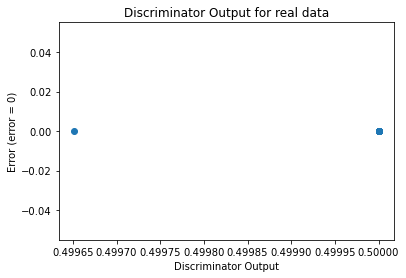

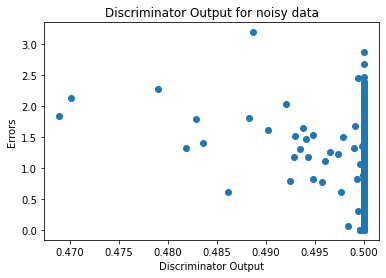

In [17]:
sanityChecks.discProbVsError(real_dataset,discriminator,device)

**Training GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [18]:
generator2 = network.Generator(n_features+1).to(device)
discriminator2 = network.Discriminator(n_features+1).to(device)
criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [19]:
discLossG2,genLossG2 = train_test.training_GAN_2(discriminator2,generator2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,device)

Number of epochs needed 5000


In [20]:
GAN2_metrics=train_test.test_generator_2(generator2,test_data,device)

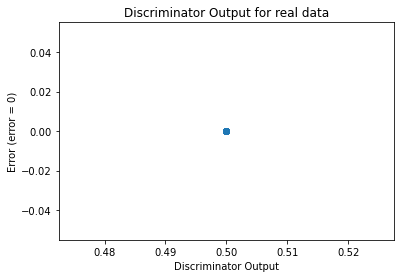

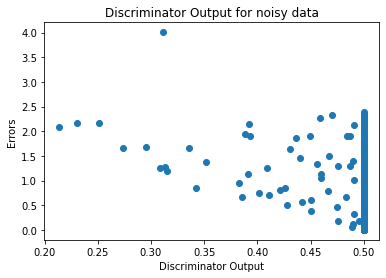

In [21]:
sanityChecks.discProbVsError(real_dataset,discriminator2,device)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [22]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [23]:
discLossA1,genLossA1 = ABC_train_test.training_GAN(disc, gen,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [24]:
ABC_GAN1_metrics=ABC_train_test.test_generator(gen,test_data,coeff,mean,variance,device)

#### Sanity Checks 

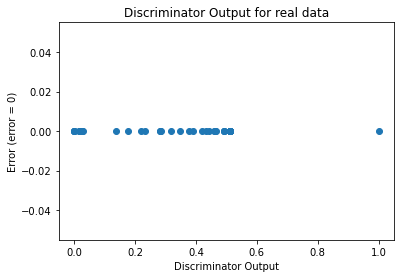

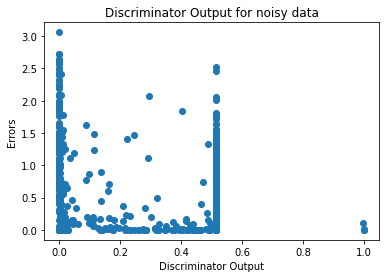

In [25]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [26]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [27]:
discLossA2,genLossA2 = ABC_train_test.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,coeff,mean,variance,device)

Number of epochs 420


In [28]:
ABC_GAN2_metrics=ABC_train_test.test_generator_2(gen2,test_data,coeff,mean,variance,device)

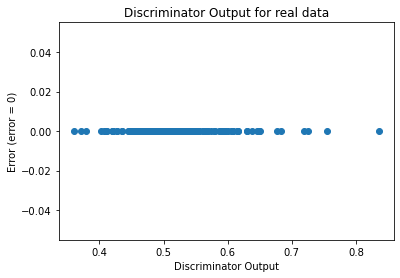

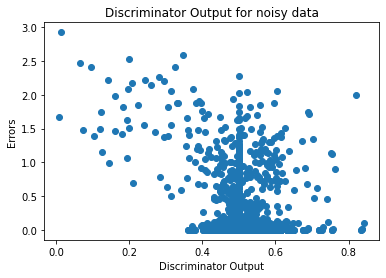

In [29]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# Model Analysis

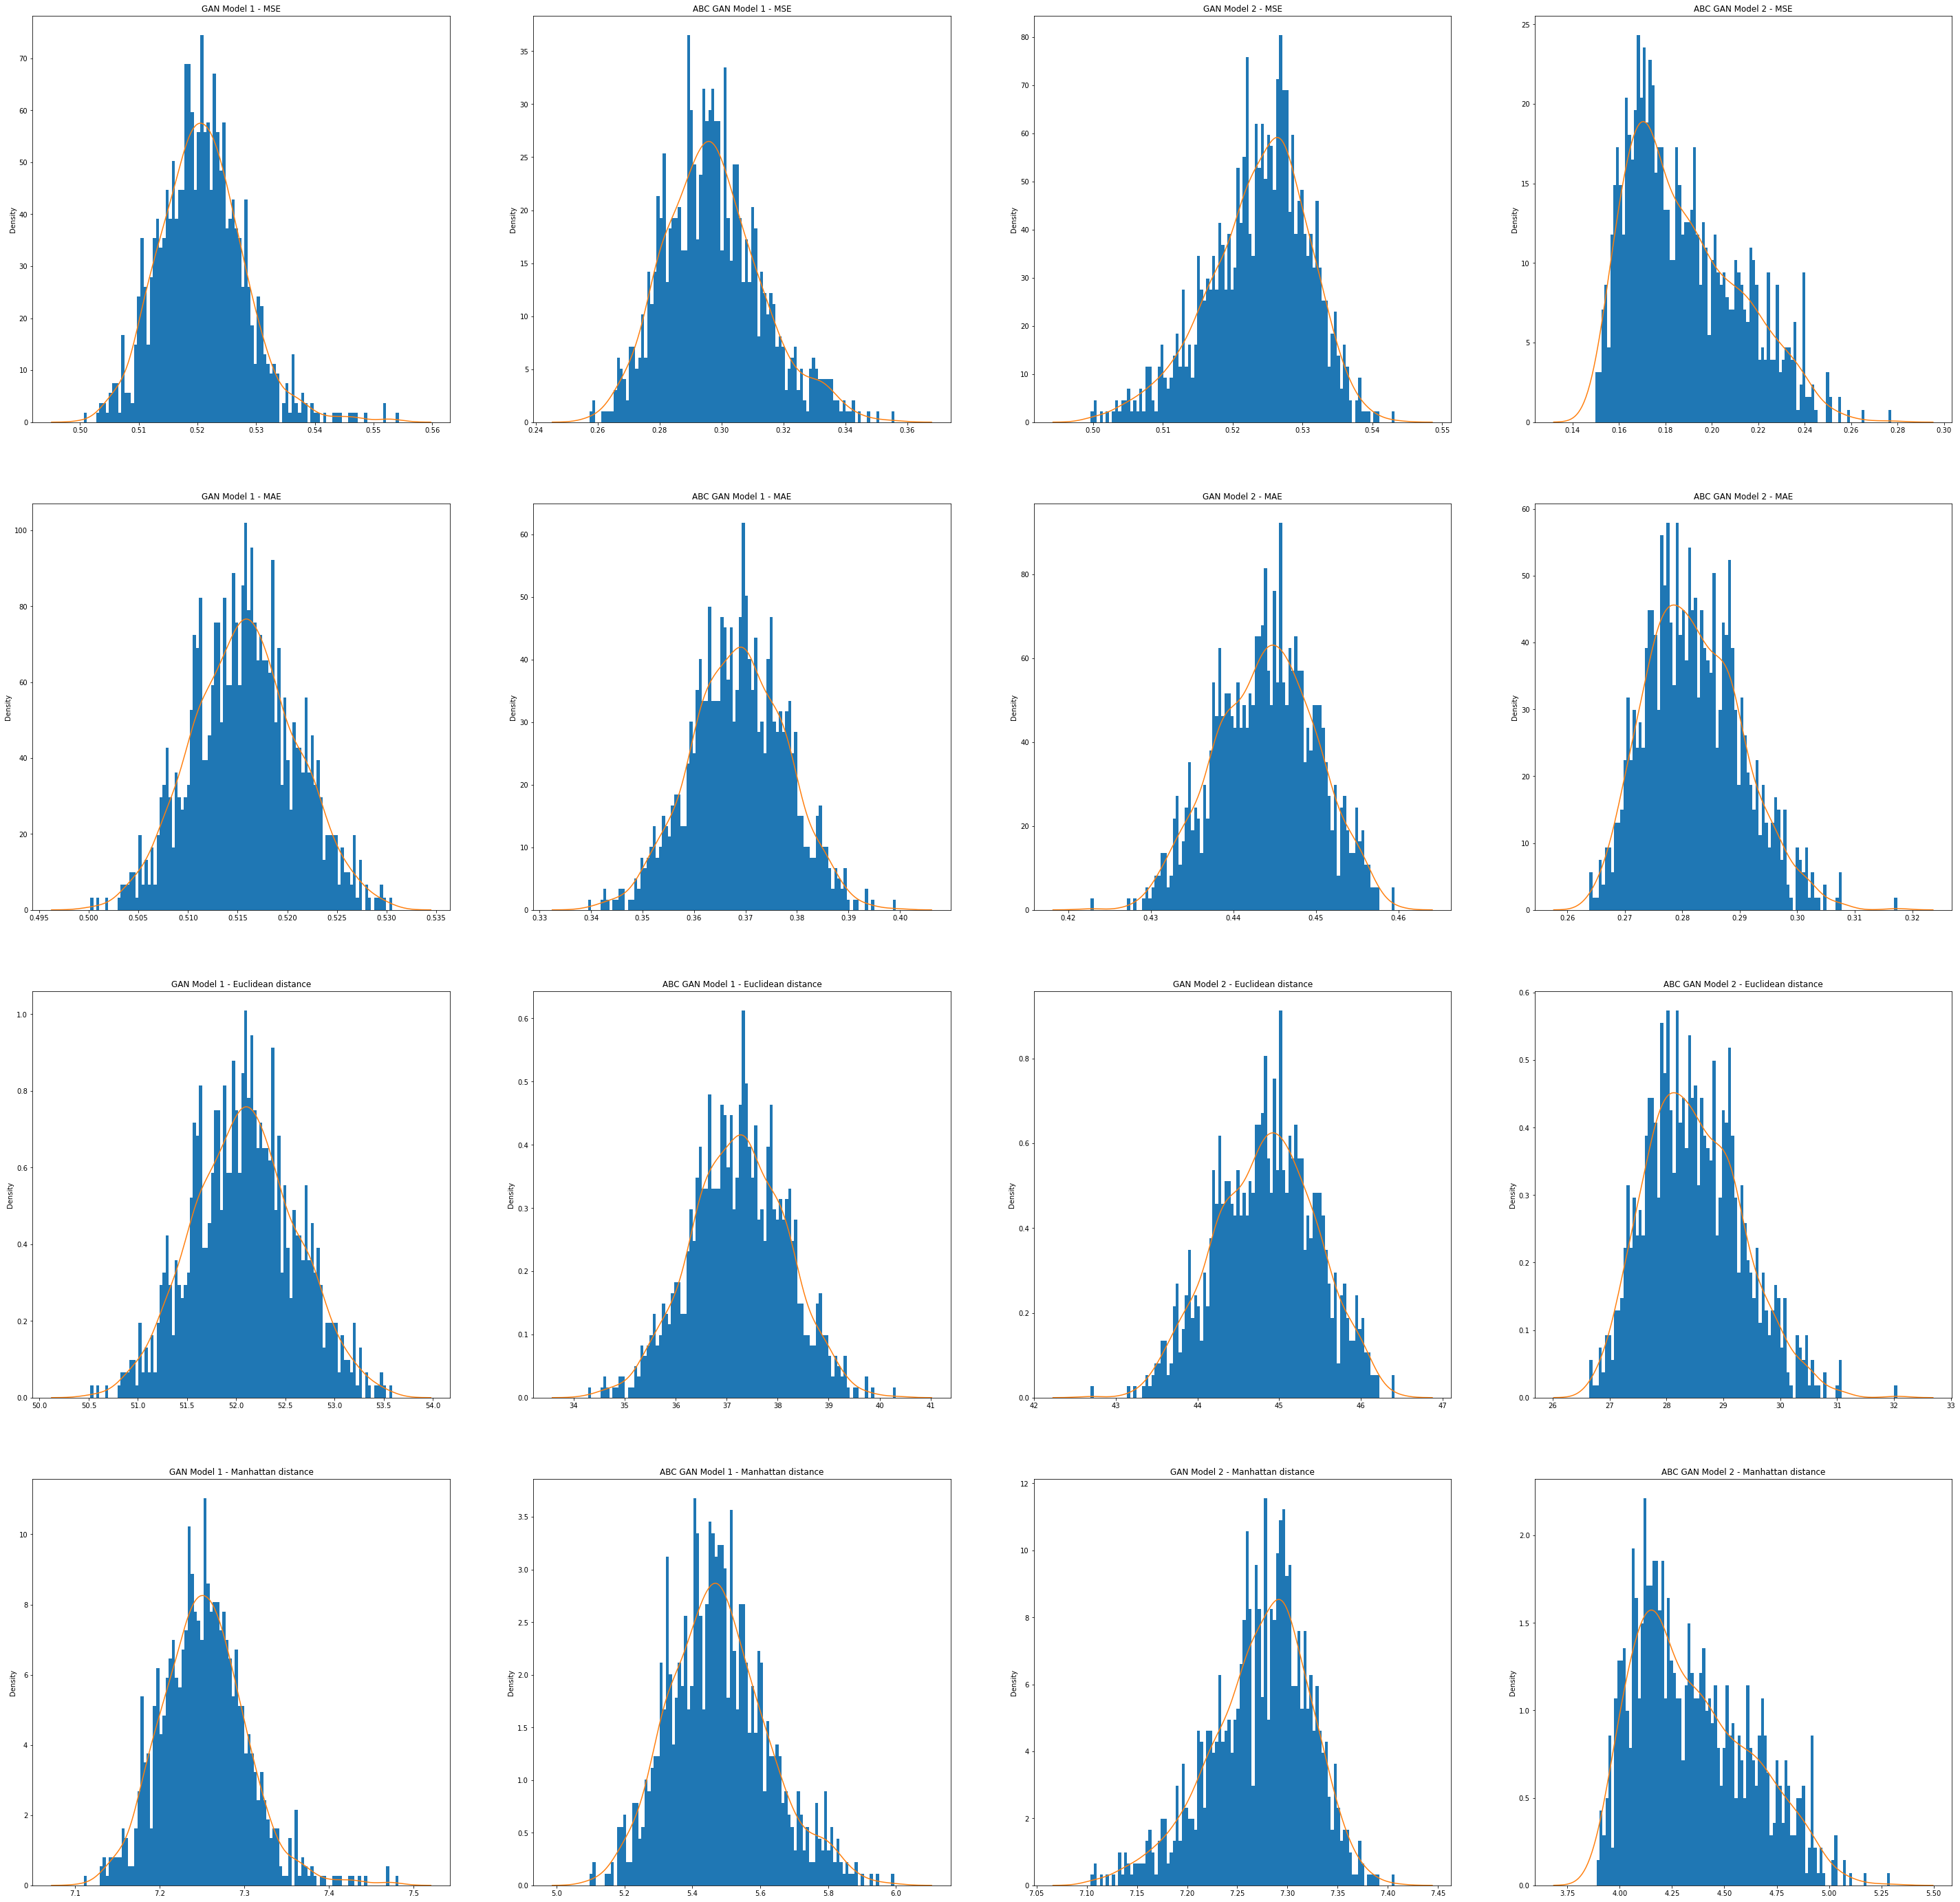

In [30]:
performanceMetrics.modelAnalysis(GAN1_metrics,ABC_GAN1_metrics,GAN2_metrics,ABC_GAN2_metrics)

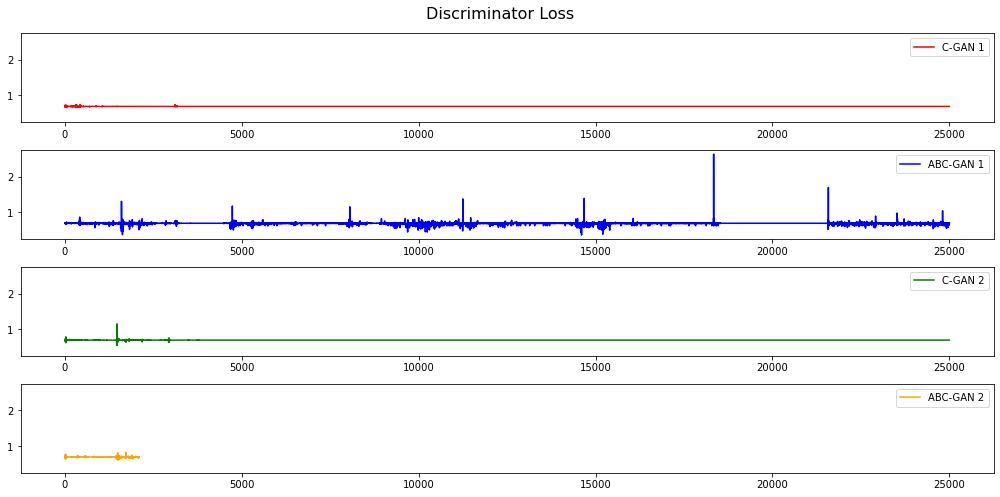

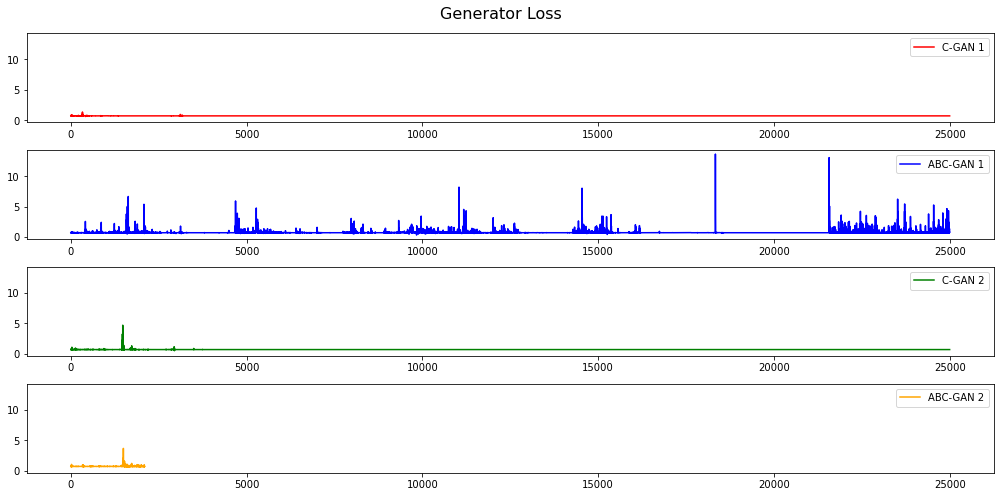

In [31]:
performanceMetrics.plotTrainingLoss(discLossG1,genLossG1,discLossA1,genLossA1,discLossG2,genLossG2,discLossA2,genLossA2)

# ABC - GAN Model with skip connection

In [32]:
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))

In [33]:
discLossA3,genLossA3 = ABC_train_test.training_GAN(disc3, gen3,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [34]:
ABC_GAN3_metrics=ABC_train_test.test_generator(gen3,test_data,coeff,mean,variance,device)

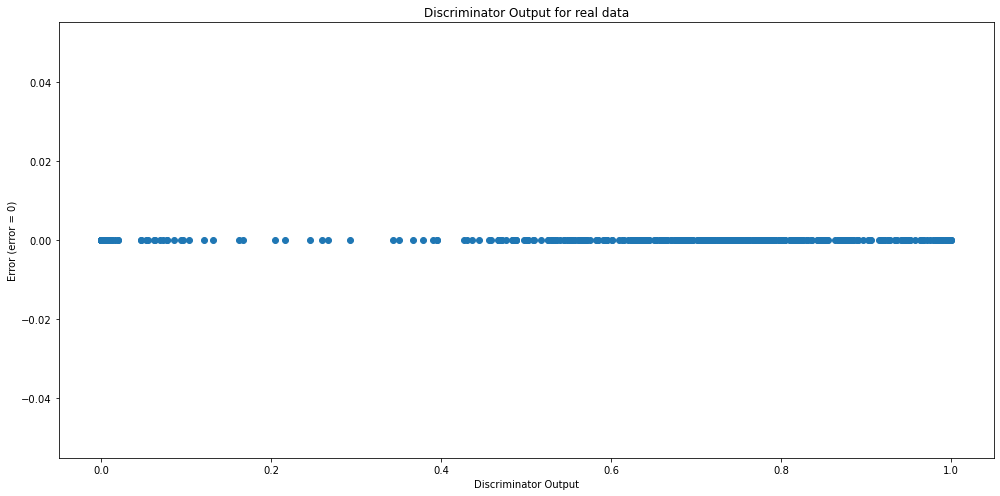

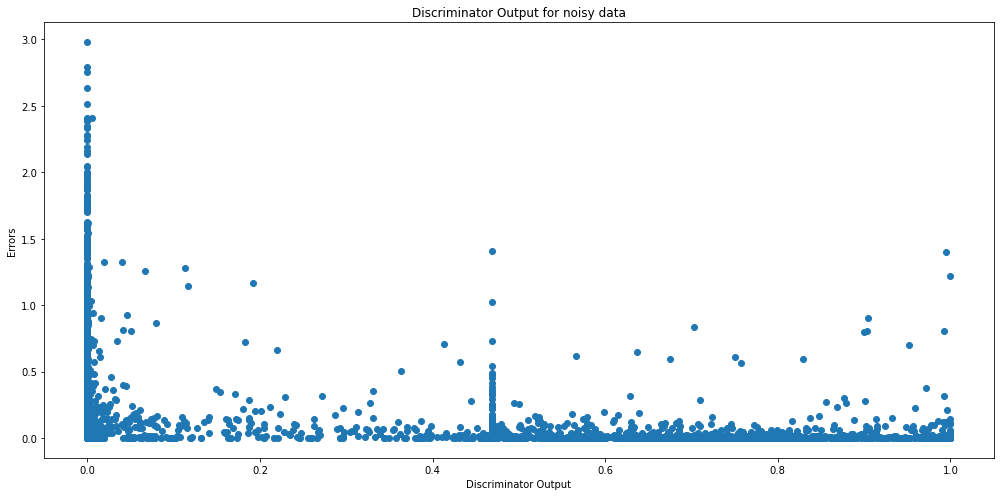

In [35]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [36]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)

Weight of the node at skip connection
Parameter containing:
tensor([[-0.2036]], device='cuda:0', requires_grad=True)


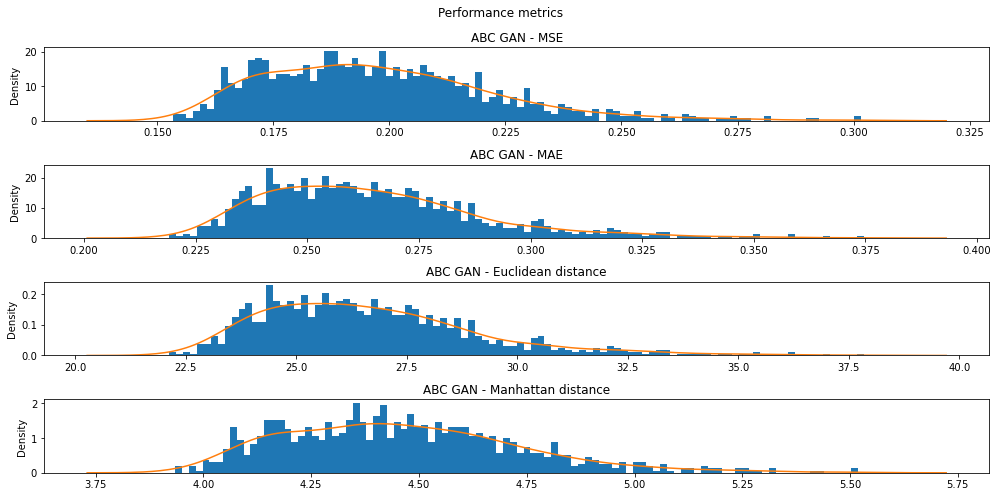

In [37]:
performanceMetrics.modelAnalysis2(ABC_GAN3_metrics)

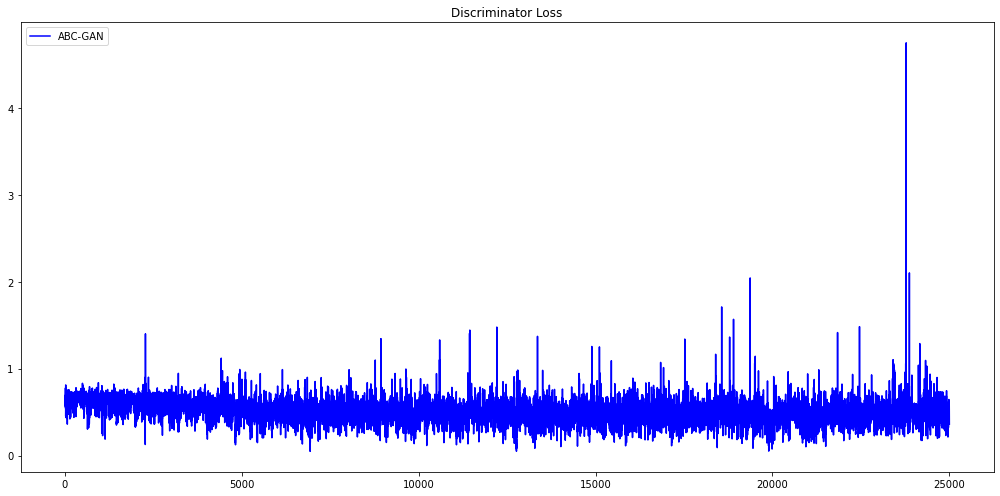

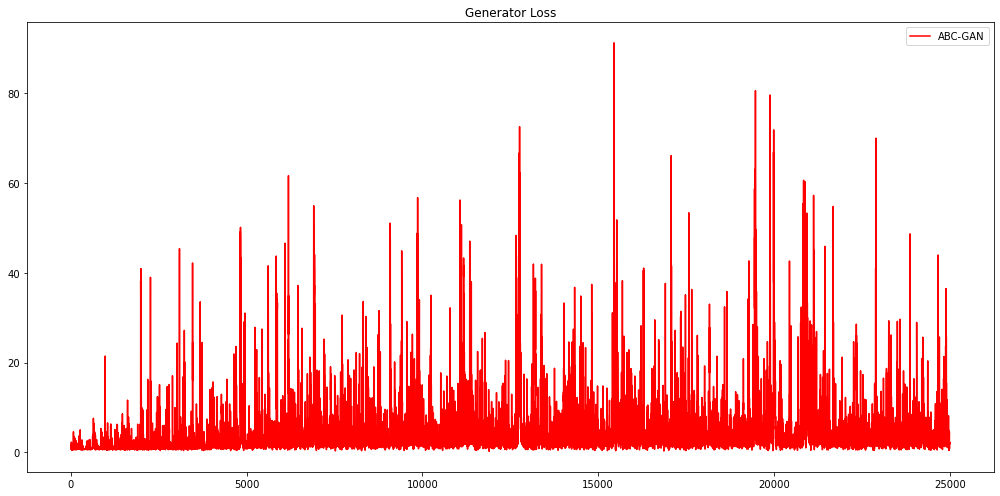

In [38]:
performanceMetrics.plotTrainingLoss2(discLossA3,genLossA3)